In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Importar dados do csv

In [44]:
df = pd.read_csv("water_potability_nonans.csv")
df.tail()
x = df.loc[:,df.columns != 'Potability']
y = df['Potability']
x.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
2010,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821


In [45]:
pd.set_option("display.max_columns", None)
df.groupby("Potability").describe()

ph                                                    \
             count      mean       std       min       25%       50%   
Potability                                                             
0           1200.0  7.067201  1.659106  1.431782  5.982888  6.992004   
1            811.0  7.113791  1.437623  0.227499  6.256039  7.046549   

                                Hardness                                    \
                 75%        max    count        mean        std        min   
Potability                                                                   
0           8.141979  14.000000   1200.0  196.008440  30.717642  98.452931   
1           7.955161  11.898078    811.0  195.908341  35.301146  73.492234   

                                                            Solids  \
                   25%         50%         75%         max   count   
Potability                                                           
0           177.313440  196.799368  214.532109  300.292476  1200.0   
1           174.380497  197.617494  218.414531  317.338124   811.0   

                                                                  \
                    mean          std          min           25%   
Potability                                                         
0           21628.535122  8461.108693   320.942611  15378.907323   
1           22344.922883  8891.547966  1198.943699  15816.076607   

                                                     Chloramines            \
                     50%           75%           max       count      mean   
Potability                                                                   
0           20507.399647  26786.546213  55334.702799      1200.0  7.107267   
1           21217.158596  27696.134419  56488.672413       811.0  7.174395   

                                                                         \
                 std       min       25%       50%       75%        max   
Potability                                                                
0           1.476577  2.456014  6.169384  7.103718  8.076759  12.653362   
1           1.732796  1.390871  6.106169  7.212254  8.181431  13.127000   

           Sulfate                                                             \
             count        mean        std         min         25%         50%   
Potability                                                                      
0           1200.0  333.742928  36.398403  203.444521  310.653441  332.615625   
1            811.0  332.457832  47.446190  129.000000  301.768819  331.087177   

                                   Conductivity                         \
                   75%         max        count        mean        std   
Potability                                                               
0           356.432048  460.107069       1200.0  427.554342  79.882677   
1           365.632984  481.030642        811.0  425.005423  81.950982   

                                                                        \
                   min         25%         50%         75%         max   
Potability                                                               
0           210.319182  369.580980  424.479471  482.333786  753.342620   
1           201.619737  360.275012  421.099917  482.296528  695.369528   

           Organic_carbon                                            \
                    count       mean       std       min        25%   
Potability                                                            
0                  1200.0  14.400250  3.370196  4.371899  12.118659   
1                   811.0  14.294764  3.257917  2.200000  12.148355   

                                            Trihalomethanes             \
                  50%        75%        max           count       mean   
Potability                                                               
0           14.351828  16.787531  27.006707          1200.0  66.278712   
1    

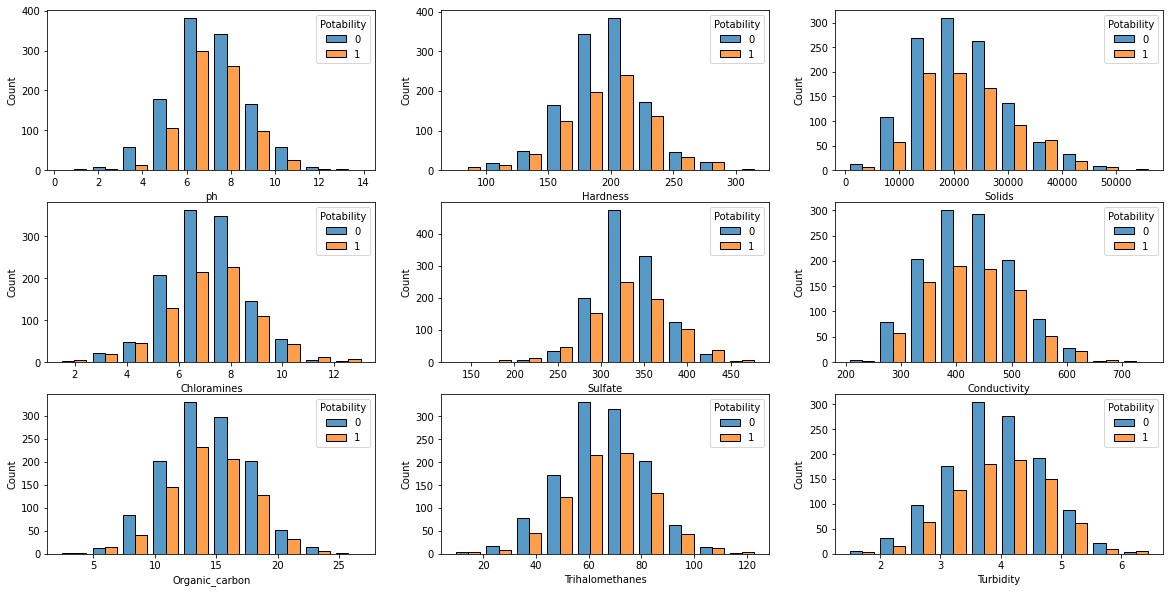

In [55]:
sns.set_palette('tab10')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
sns.histplot(data=df, bins=10, x="ph", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x="Hardness", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[0][1])
sns.histplot(data=df, bins=10, x="Solids", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[0][2])
sns.histplot(data=df, bins=10, x="Chloramines", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[1][0])
sns.histplot(data=df, bins=10, x="Sulfate", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[1][1])
sns.histplot(data=df, bins=10, x="Conductivity", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[1][2])
sns.histplot(data=df, bins=10, x="Organic_carbon", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[2][0])
sns.histplot(data=df, bins=10, x="Trihalomethanes", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[2][1])
sns.histplot(data=df, bins=10, x="Turbidity", hue="Potability", multiple="dodge", shrink=0.8, ax=axes[2][2])



plt.show()

Através da imagem anterior podemos perceber que os dados não estão bem distribuídos de acordo com a potabilidade, por isso faremos a comparação de cada par de característica

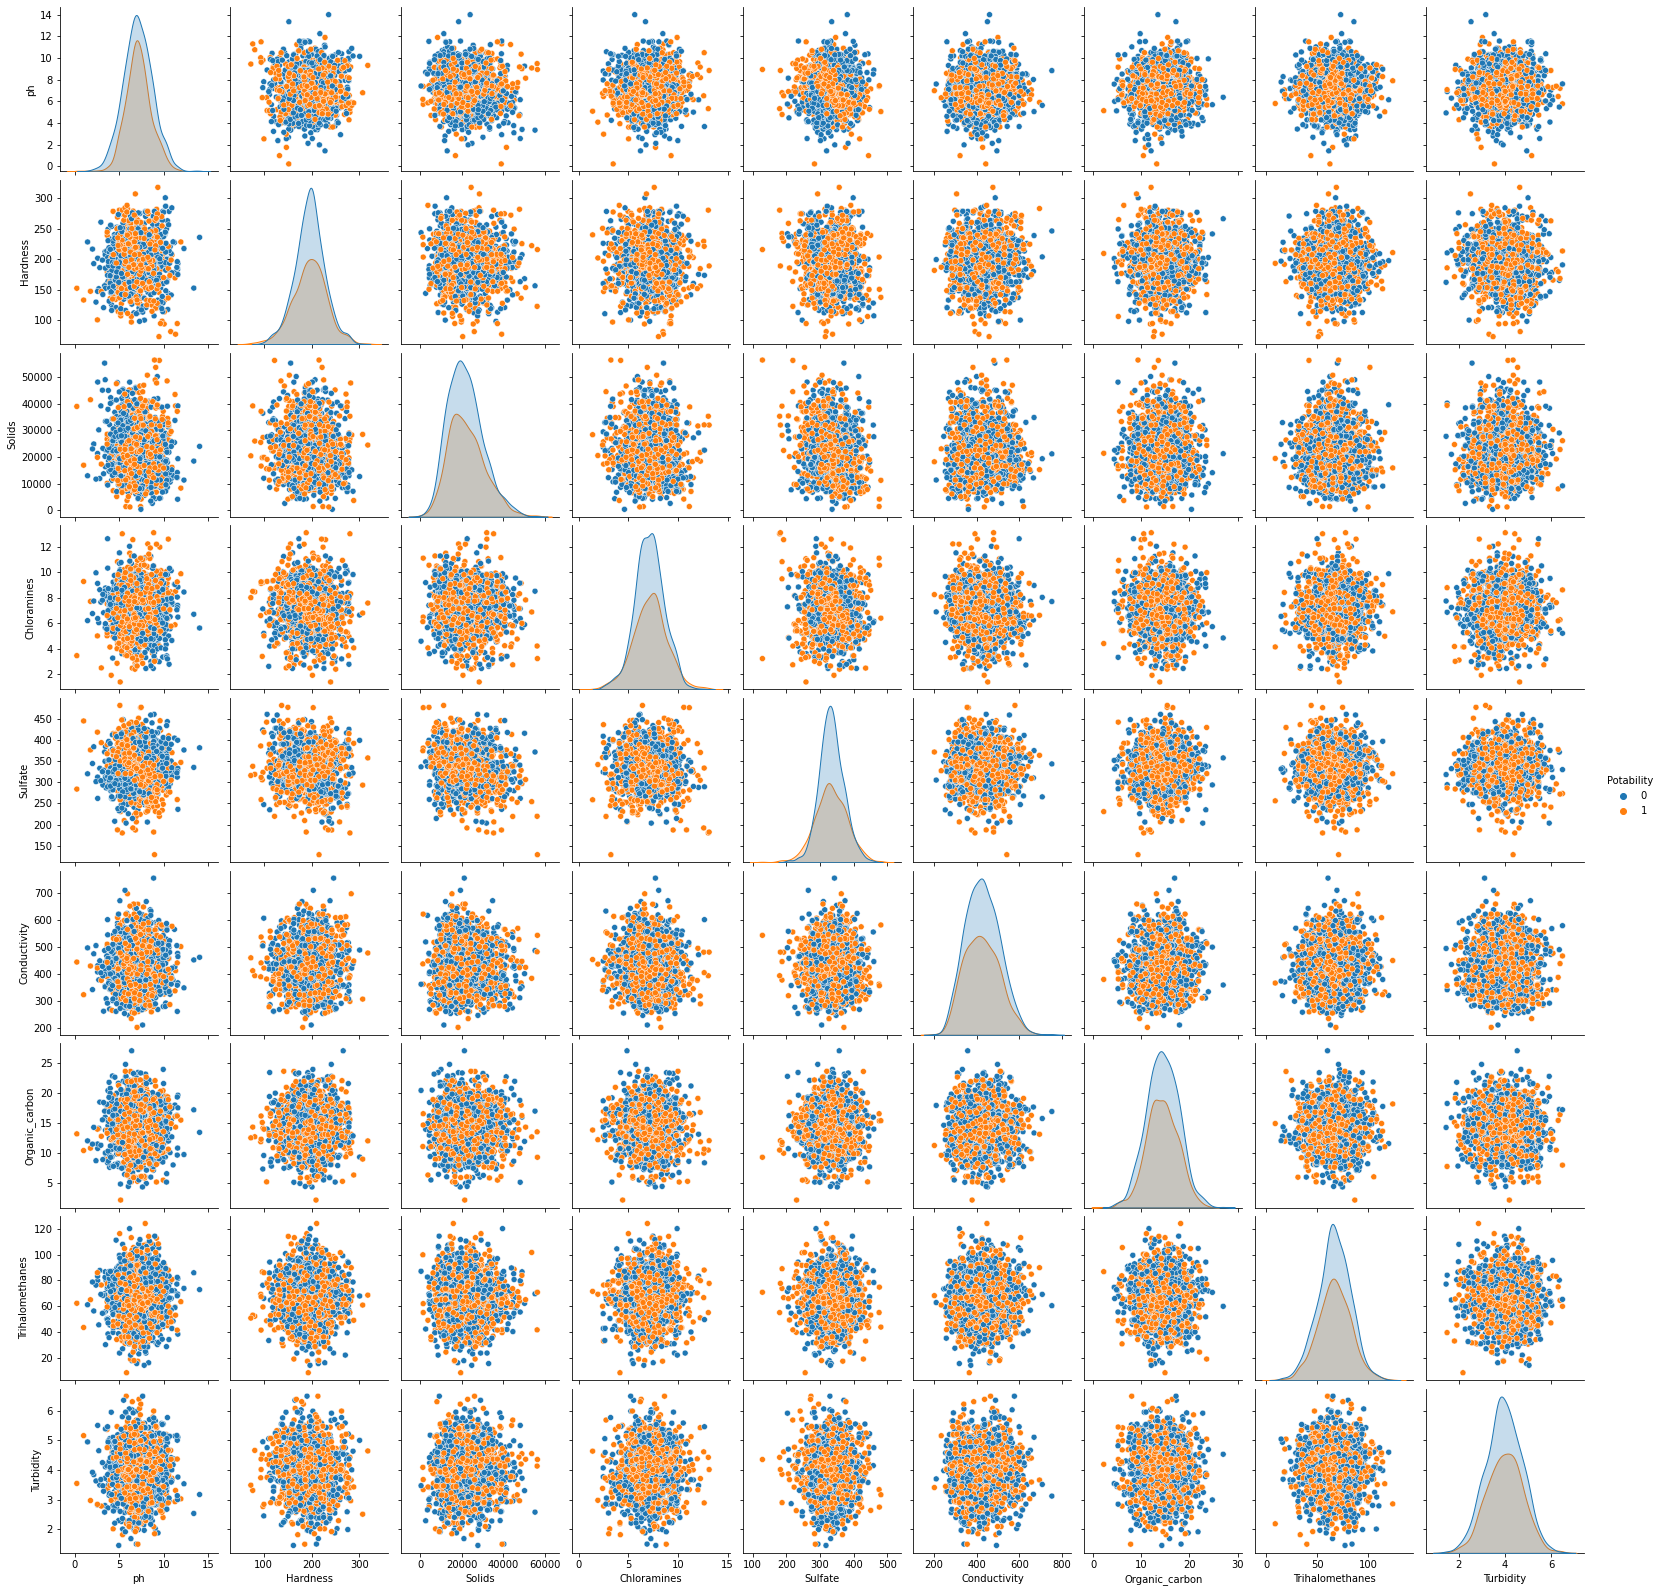

In [61]:
sns.pairplot(df, hue="Potability")

Mesmo comparando cada par de característica, não há bons limiares para caracterização, por isso será feito a normalização dos dados, e então a transformação através do PCA de todas as características para apenas duas dimensões.

In [48]:
#A biblioteca sklearn possui uma implementação de PCA baseado em SVD no modulo decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()  # instancia o StandardScaler
ss.fit(x)              # estima a média e o desvio-padrão de todos atributos
X_ss = ss.transform(x) # realiza a normalização z-score nos atributos

In [59]:
pca_ss = PCA(n_components=2)
pca_ss.fit(X_ss)
X_ss_pca = pca_ss.transform(X_ss)
X_ss_pca_df = pd.DataFrame(X_ss_pca, columns=['PC 0', 'PC 1'])
X_ss_pca_df.tail()

,PC 0,PC 1
2006,-0.461479,-0.752429
2007,-0.130748,-0.189528
2008,1.337752,0.013148
2009,0.576312,0.641426
2010,2.541301,0.418424


### Relevância das caracteristicas para a transformação PCA

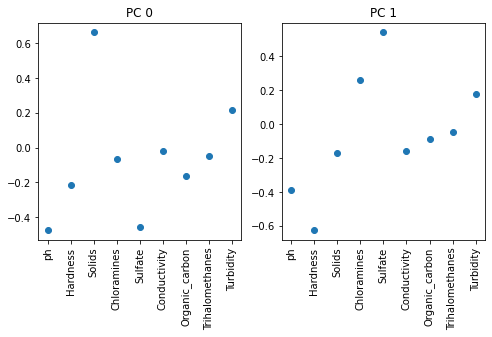

In [58]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
for idx, pc in enumerate(pca_ss.components_):
    ax[idx].scatter(np.arange(len(x.columns)), pc)
    ax[idx].set_xticks(np.arange(len(x.columns)))
    ax[idx].set_xticklabels(x.columns, rotation=90)
    ax[idx].set_title('PC %d' % (idx))
plt.show()

In [68]:
print("Instâncias originais: %s\nInstâncias projetadas nos componentes principais: %s" % (str(df.shape), str(X_ss_pca_df.shape)))

Instâncias originais: (2011, 10)
Instâncias projetadas nos componentes principais: (2011, 2)


<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

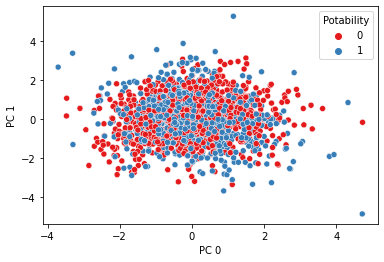

In [52]:
sns.set_palette('seismic')
sns.scatterplot(data=X_ss_pca_df, x='PC 0', y='PC 1', hue=y, palette='Set1')

# KNN em dois níveis

In [60]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [66]:
k1 = 10 #controla o número de vias da validação cruzada para estimar o desempenho do modelo
k2 = 10 #controla o número de vida da validação cruzada para otimização de hiperparametros

#usar o protocolo de validação cruzada estratificada
skf = StratifiedKFold(n_splits=k1, shuffle=True, random_state=1)

acuracias = []
x = x.values
#a função split retorna os índices das instâncias que devem ser usadas para o treinamento e o teste.
for idx_treino, idx_teste in skf.split(x, y):
    
    #extrair as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
    X_treino = x[idx_treino]
    y_treino = y[idx_treino]
    
    #extrair as instâncias de teste de acordo com os índices fornecidos pelo skf.split
    X_teste = x[idx_teste]
    y_teste = y[idx_teste]
    
    #colocar todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
    ss = StandardScaler()
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_teste = ss.transform(X_teste)
    
    #combinações de parametros otimizar. Aqui estamos apenas otimizando o número de vizinhos mais próximos para o knn (k).
    #Entretanto, podemos colocar todos os valores de todos os parametros. O sklearn se encarrega de gerar todas as combinações.
    params = {'n_neighbors' : range(1,30,2)}
    #instanciar um KNN com parametros padrão
    knn = KNeighborsClassifier()
    #instanciar um GridSearchCV com k2 vias.
    knn = GridSearchCV(knn, params, cv=StratifiedKFold(n_splits=k2))
    #realizar a otimização dos hiperparâmetros e treinar o modelo final com a melhor combinação de hiperparametros com todos os dados de treinamento
    knn.fit(X_treino, y_treino)
    
    #calcular a acurácia no conjunto de testes desta iteração e salvar na lista.
    acuracias.append(accuracy_score(y_teste, knn.predict(X_teste)))
    
#calcular as estatísticas da validação cruzada. Estas estatísticas nos dão uma confiança que, na média, este é o desempenho esperado
#do classificador no mundo real.
print("min: %.2f, max: %.2f, avg +- std: %.2f+-%.2f" % (min(acuracias), max(acuracias), np.mean(acuracias), np.std(acuracias)))

min: 0.61, max: 0.67, avg +- std: 0.65+-0.02
